<a href="https://colab.research.google.com/github/navroz-lamba/DS-Unit-2-Linear-Models/blob/master/2020_08_04_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 2
- Do train/test split
- Use scikit-learn to fit a multiple regression
- Understand how ordinary least squares regression minimizes the sum of squared errors

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Wrangle Data

In [ ]:
# Import data into df
import pandas as pd
df = pd.read_csv(DATA_PATH+'elections/bread_peace_voting.csv', index_col='Year')
df

,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
Year,,,,,
1952,Stevenson,Eisenhower,2.40,190,44.60
1956,Eisenhower,Stevenson,2.89,0,57.76
1960,Nixon,Kennedy,0.85,0,49.91
1964,Johnson,Goldwater,4.21,1,61.34
1968,Humphrey,Nixon,3.02,146,49.60
1972,Nixon,McGovern,3.62,0,61.79
1976,Ford,Carter,1.08,2,48.95
1980,Carter,Reagan,-0.39,0,44.70
1984,Reagan,Mondale,3.86,0,59.17


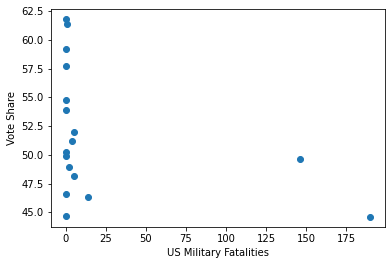

In [ ]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(df['US Military Fatalities per Million'],
            df['Incumbent Party Vote Share'])
plt.xlabel('US Military Fatalities')
plt.ylabel('Vote Share')
plt.show();

# Split the Data

In [ ]:
# Split my feature matrix from the target vector
y = df['Incumbent Party Vote Share']
X = df[['Average Recent Growth in Personal Incomes',
        'US Military Fatalities per Million']]

In [ ]:
# Split our dataset into training and validation sets
# Train on elections before 2008. Validation on 2008 and after.

cutoff = 2008
mask = X.index < 2008
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]

# Baseline

In [ ]:
def baseline_predict(X=None):
  return y_train.mean()

baseline_predict()

52.46857142857142

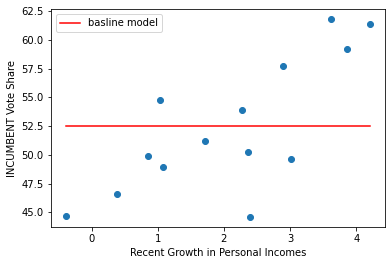

In [ ]:
import numpy as np

col = 'Average Recent Growth in Personal Incomes'
x_min, x_max = X_train[col].min(), X_train[col].max()
x_coords = np.linspace(x_min, x_max, 50)
y_pred = [baseline_predict(x) for x in x_coords]
plt.plot(x_coords, y_pred, color='red', label='basline model')

plt.scatter(X_train[col], y_train)
plt.xlabel('Recent Growth in Personal Incomes')
plt.ylabel('INCUMBENT Vote Share')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

baseline_mae = mean_absolute_error(y_train, [y_train.mean()]*len(y_train))
baseline_rmse = mean_squared_error(y_train, [y_train.mean()]*len(y_train), squared=False)

print('Baseline MAE:', baseline_mae)
print('Baseline RMSE:', baseline_rmse)

Baseline MAE: 4.846938775510204
Baseline RMSE: 5.584526910699467


# Build Model

In [ ]:
# Start with one feature
# Import our predictor
from sklearn.linear_model import LinearRegression

# Instantiate our prediction
model = LinearRegression()

# Fit our model to the training data
model.fit(X_train[[col]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_train[[col]])
y_pred

array([53.44120214, 54.9965044 , 48.52136847, 59.18629823, 55.40913561,
       57.31358735, 49.2514083 , 44.58550153, 58.07536805, 53.02857093,
       47.02954794, 49.12444486, 53.31423869, 51.2828235 ])

# Check Metrics

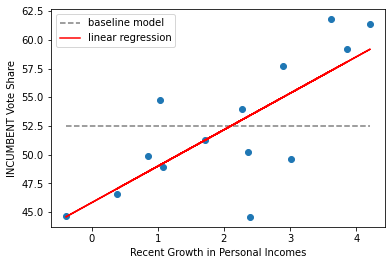

In [ ]:
col = 'Average Recent Growth in Personal Incomes'
x_min, x_max = X_train[col].min(), X_train[col].max()
x_coords = np.linspace(x_min, x_max, 50)
y_pred = [baseline_predict(x) for x in x_coords]
plt.plot(x_coords, y_pred, color='gray', label='baseline model', linestyle='--')

y_pred = model.predict(X_train[[col]])
plt.plot(X_train[[col]], y_pred, color='red', label='linear regression')

plt.scatter(X_train[col], y_train)
plt.xlabel('Recent Growth in Personal Incomes')
plt.ylabel('INCUMBENT Vote Share')
plt.legend()
plt.show();

In [ ]:
# Checking our metrics for the TRAINING DATA
model_mae = mean_absolute_error(y_train, y_pred)
model_rmse = mean_squared_error(y_train, y_pred, squared=False)
model_r2 = r2_score(y_train, y_pred)

print('Model MAE (training data):', model_mae)
print('Model RMSE (training data):', model_rmse)
print('Model R^2 (training data):', model_r2)

Model MAE (training data): 2.645479454315596
Model RMSE (training data): 3.6773568396257406
Model R^2 (training data): 0.5663905156461234


In [ ]:
# Checking our metrics for the VALIDATION DATA
y_pred = model.predict(X_val[[col]])

model_mae = mean_absolute_error(y_val, y_pred)
model_rmse = mean_squared_error(y_val, y_pred, squared=False)
model_r2 = r2_score(y_val, y_pred)

print('Model MAE (validation data):', model_mae)
print('Model RMSE (validation data):', model_rmse)
print('Model R^2 (validation data):', model_r2)

Model MAE (validation data): 1.7998717748375863
Model RMSE (validation data): 2.180652086836372
Model R^2 (validation data): 0.14809080764669635


## Multiple Linear Regression

In [ ]:
# Instantiate our prediction
model2 = LinearRegression()

# Fit our model to the training data
model2.fit(X_train, y_train);

In [ ]:
model2.coef_

array([ 3.59004735, -0.05315709])

In [ ]:
y_pred = model2.predict(X_train)

model_mae = mean_absolute_error(y_train, y_pred)
model_rmse = mean_squared_error(y_train, y_pred, squared=False)
model_r2 = r2_score(y_train, y_pred)

print('Model MAE (training data):', model_mae)
print('Model RMSE (training data):', model_rmse)
print('Model R^2 (training data):', model_r2)

Model MAE (training data): 1.3303221006874268
Model RMSE (training data): 1.9823427386821593
Model R^2 (training data): 0.8739958896016927


In [ ]:
y_pred = model2.predict(X_val)

model_mae = mean_absolute_error(y_val, y_pred)
model_rmse = mean_squared_error(y_val, y_pred, squared=False)
model_r2 = r2_score(y_val, y_pred)

print('Model MAE (validation data):', model_mae)
print('Model RMSE (validation data):', model_rmse)
print('Model R^2 (validation data):', model_r2)

Model MAE (validation data): 1.6341722692537293
Model RMSE (validation data): 1.8613616351898397
Model R^2 (validation data): 0.3792995526663848
